<a href="https://colab.research.google.com/github/Katie0731/stats_DL/blob/main/0531_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%80%ED%94%8C_%EC%97%B0%EC%8A%B5_(TPU)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaurdyou","key":"65b4fed121c42003bb7a2d1b0466d46f"}'}

In [2]:
import os
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c unifesp-x-ray-body-part-classifier

100% 29.9G/29.9G [07:27<00:00, 116MB/s]
100% 29.9G/29.9G [07:27<00:00, 71.8MB/s]


In [5]:
os.listdir()

['.config',
 'kaggle.json',
 'unifesp-x-ray-body-part-classifier.zip',
 'sample_data']

In [6]:
!unzip -qq unifesp-x-ray-body-part-classifier.zip

In [7]:
os.listdir()

['.config',
 'test',
 'kaggle.json',
 'train.csv',
 'train',
 'sample_submission.csv',
 'unifesp-x-ray-body-part-classifier.zip',
 'sample_data']

In [8]:
os.remove('unifesp-x-ray-body-part-classifier.zip')

In [9]:
cd train

/content/train


In [11]:
ls

train/


In [12]:
cd -

/content


In [ ]:
#cd -

/content/test


In [ ]:
#ls

test/


In [ ]:
#cd -

/content/test


In [ ]:
#cd -

/content/test/test


In [ ]:
#print(len(os.listdir('test')))

411


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")

In [ ]:
df.shape

(1738, 2)

In [ ]:
labels = df['SOPInstanceUID']
labels

0       1.2.826.0.1.3680043.8.498.10025629581362719970...
1       1.2.826.0.1.3680043.8.498.10036150326276641158...
2       1.2.826.0.1.3680043.8.498.10038426859954986240...
3       1.2.826.0.1.3680043.8.498.10050991192143676483...
4       1.2.826.0.1.3680043.8.498.10053309524595490852...
                              ...                        
1733    1.2.826.0.1.3680043.8.498.99711016467406172920...
1734    1.2.826.0.1.3680043.8.498.99727280485333900933...
1735    1.2.826.0.1.3680043.8.498.99935008698914755885...
1736    1.2.826.0.1.3680043.8.498.99969671777553755311...
1737    1.2.826.0.1.3680043.8.498.99979421603039894766...
Name: SOPInstanceUID, Length: 1738, dtype: object

In [13]:
train_index_dir = "train/train/"

for (path, dir, files) in os.walk(train_index_dir):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.dcm':
            print("%s/%s" % (path, filename))

train/train/115/1.2.826.0.1.3680043.8.498.12716691623975257992451897131008205016/1.2.826.0.1.3680043.8.498.98956106799905505311283847772216080723/1.2.826.0.1.3680043.8.498.10678203561828406242444157105484930995-c.dcm
train/train/299/1.2.826.0.1.3680043.8.498.69924826982136459536474371032512137808/1.2.826.0.1.3680043.8.498.12033495852882474340767999684889333665/1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125-c.dcm
train/train/299/1.2.826.0.1.3680043.8.498.69924826982136459536474371032512137808/1.2.826.0.1.3680043.8.498.13213220649432453835890212694197986079/1.2.826.0.1.3680043.8.498.91318950485398180219054924158218997043-c.dcm
train/train/299/1.2.826.0.1.3680043.8.498.69924826982136459536474371032512137808/1.2.826.0.1.3680043.8.498.95697232550136059343847030872001880552/1.2.826.0.1.3680043.8.498.12427822628606725405138429120863059498-c.dcm
train/train/299/1.2.826.0.1.3680043.8.498.69924826982136459536474371032512137808/1.2.826.0.1.3680043.8.498.4521730337579746891549929

In [ ]:
train_index_dir = "train/train/"

for (path, dir, files) in os.walk(train_index_dir):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.dcm':
            print("%s/%s" % (path, filename))

# 5월 23일까지 해놨던 내용들

In [ ]:
train_index_dir = "train/train/"

train_index_paths = sorted(
    [os.path.join(train_index_dir, fname)
     for fname in os.listdir(train_index_dir)])

In [ ]:
fname = os.listdir(train_index_paths[5])
fname = "".join(fname)
fname

'1.2.826.0.1.3680043.8.498.61746690124118892528305417421864320307'

In [ ]:
fname2 = os.listdir(train_index_paths[5]+ "/" + fname)
fname2 = "".join(fname2)
fname2

'1.2.826.0.1.3680043.8.498.21605553573167556338806385057474412247'

In [ ]:
fname3 = os.listdir(train_index_paths[5]+ "/" + fname + "/" + fname2)
fname3 = "".join(fname3)
fname3

'1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925-c.dcm'

In [ ]:
my_path = '/content/drive/MyDrive/additional_package'
!pip install --target=$my_path pydicom

import sys
sys.path.append('/content/drive/MyDrive/additional_package')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.9 MB/s 


In [ ]:
import pydicom
import matplotlib.pyplot as plt

file_path = train_index_paths[5]+ "/" + fname + "/" + fname2 + "/" + fname3
dcm = pydicom.dcmread(file_path)
img = dcm.pixel_array

/content/drive/MyDrive/additional_package/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


In [ ]:
img.shape

(3480, 4240)

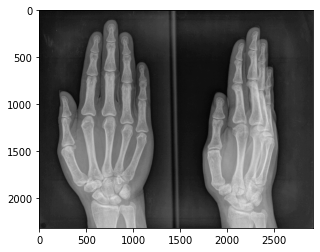

In [ ]:
plt.imshow(img, cmap='gray_r')